# Image Classification - Capstone Project

**Background**


As a final project of my Udacity Nanodegree Program I decided to go a bit deeper into Deep Learning and go through an exercise within Image Classification. As Udacity has a prepared project with Dog Breed classification as an option I decided to do my classification project within dog breeds as well. This said. I have not followed the prepared project that Udacity provided but instead structured my own way of doing it. 



* [Step 1](#step1): Load and prepare data
* [Step 2](#step2): Data Agumentation
* [Step 3](#step3): Create a CNN to Classify Dog Breeds
* [Step 4](#step4): Use a CNN to Classify Dog Breeds - Using Transfer Learning


**The data**

The data is downloaded from a Kaggle challenge but originates from Stanford and includes 120 different dog breeds within the over 20.000 images. For my work I will use about half of the available pictures (~10.000).  

**My Goals**

* Get an understanding of Tensorflow as a deep learning library
* Explore different options of data preperation for deep learning with Tensorflow
* Explore different options of data agumentation from deep learning with Tensorflow
* Create a Image Classifier using a Convolutional Neural Network from scratch
* Create a Image Classifier using a Convolutional Neural Network with the use of Transfer Learning

Okey. Lets get started and import some libraries needed for our work. 

**Import libraries**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.enable_eager_execution()


In [115]:
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Step 0 - Load and prepare data

In [3]:
dog_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/7327/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1566638124&Signature=mjLdvquKoA1aXJYkUbn3OxM4m4kwqs5fdrUwAZubOEuKr8n23XG61FXXwnq7ZPAOC5kWZvEc4Fma%2BQnOlumV0R%2BoKVw0ahz6b%2BSXsthzziUV50fRilnNeGe8GexpAZrT5vPy2GmvzQ27VfkIRTdandQFAeJ%2BenF5d%2FygKI6Dz5%2BjpfPNstvSbsY8mH4OVavzxhgXcDkUUvC%2BhBXR6zaBiR6Zk6Le2tKieTXGq1n1tVf2OrFzdZ5Pn834pnR88te95rQnYXdQN2dVWG0cKJTlXbAold5P5ZjJMBtDk0A4bickjyouyEI5%2F9DGXy%2FEeR5juH2oIy%2FoOvjnwQgwxe41QA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddog-breed-identification.zip'
zip_dir = tf.keras.utils.get_file('dog-breed-identification.zip', origin=dog_url, extract=True)

723329024/723322089 [==============================] - 4s 0us/step


Performing file/OS operations to place file in the right location on VM.

In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets


In [5]:
!unzip /root/.keras/datasets/train.zip
!cp /root/.keras/datasets/labels.csv /content
!ls

Archive:  /root/.keras/datasets/train.zip
   creating: train/
  inflating: train/000bec180eb18c7604dcecc8fe0dba07.jpg  
  inflating: train/001513dfcb2ffafc82cccf4d8bbaba97.jpg  
  inflating: train/001cdf01b096e06d78e9e5112d419397.jpg  
  inflating: train/00214f311d5d2247d5dfe4fe24b2303d.jpg  
  inflating: train/0021f9ceb3235effd7fcde7f7538ed62.jpg  
  inflating: train/002211c81b498ef88e1b40b9abf84e1d.jpg  
  inflating: train/00290d3e1fdd27226ba27a8ce248ce85.jpg  
  inflating: train/002a283a315af96eaea0e28e7163b21b.jpg  
  inflating: train/003df8b8a8b05244b1d920bb6cf451f9.jpg  
  inflating: train/0042188c895a2f14ef64a918ed9c7b64.jpg  
  inflating: train/004396df1acd0f1247b740ca2b14616e.jpg  
  inflating: train/0067dc3eab0b3c3ef0439477624d85d6.jpg  
  inflating: train/00693b8bc2470375cc744a6391d397ec.jpg  
  inflating: train/006cc3ddb9dc1bd827479569fcdc52dc.jpg  
  inflating: train/0075dc49dab4024d12fafe67074d8a81.jpg  
  inflating: train/00792e341f3c6eb33663e415d0715370.jpg  
  inflatin

In [6]:
num_dogs_tr = len(os.listdir('train'))
print('total training dog images:', num_dogs_tr)

total training dog images: 10222


In [7]:
my_path = !pwd
my_path[0]

'/content'

In [8]:
#Creating a list of all paths to the images in the train folder
import pathlib

data_root = pathlib.Path(my_path[0])

all_image_paths = list(data_root.glob('train/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
image_count

10222

In [9]:
all_image_paths[:10]

['/content/train/b4f8d8eff4f0b4d93b8416a87daa3b93.jpg',
 '/content/train/0fa302727af44e7ad8033825cea98d7c.jpg',
 '/content/train/c6a38c57908b41c162bff2889280896d.jpg',
 '/content/train/44e59225be92c4cecb96acc669962242.jpg',
 '/content/train/d4a4c720a052e2004879b0177473d53a.jpg',
 '/content/train/f8a46f8751e34aac4b262fed49f210c6.jpg',
 '/content/train/8b757446986fba8aa687d6106f339831.jpg',
 '/content/train/c3a7c85f61db74978cb692931639024b.jpg',
 '/content/train/52c9ab0f6d9f27daaf3641f86c019cae.jpg',
 '/content/train/8e8e8e089554f1c73883a0172649a0f2.jpg']

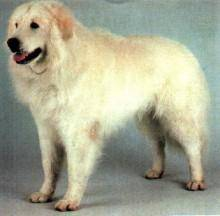

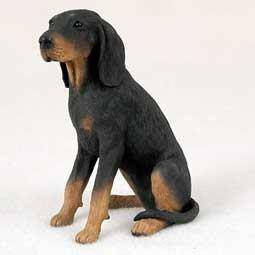

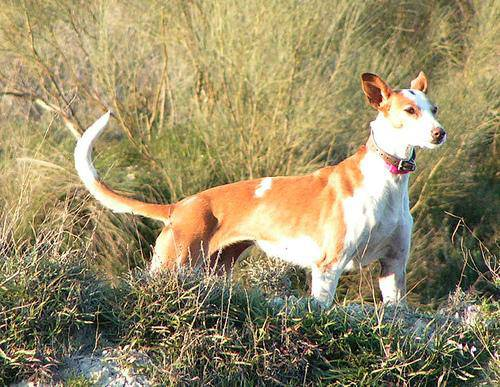

In [10]:
#Look at three random images from the training set
import IPython.display as display
import random

for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print()

In [11]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
dog_class = list(labels['breed'].unique())
dog_class.sort()

In [13]:
dog_class[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

In [0]:
#Create a dictionary with the name of the dogs with a corresponding number
label_to_index = dict((name, index) for index,name in enumerate(dog_class))


In [0]:
#Loop through label dataframe and create a list of labels matching 'all_image_paths'
label_list = []
for img_path in all_image_paths :
  image = img_path[15:-4]
  breed = labels[labels['id'] == image]['breed'].values[0]
  index = label_to_index[breed]
  label_list.append(index)

In [16]:
print("First 10 labels indices: ", label_list[:10])

First 10 labels indices:  [78, 119, 70, 19, 7, 56, 70, 20, 111, 60]


In [17]:
img_path = all_image_paths[0]
img_path

'/content/train/b4f8d8eff4f0b4d93b8416a87daa3b93.jpg'

**Importing data into Tensorflow**

Now it is time to convert our images into a format that we can use in our soon to be created Neural Network. The way to do this is to create tensors out of the images. This is done using the tensorflow Data API. Specifically we use `tf.data.Dataset.from_tensor_slices()` method.
<br><br>


In [0]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [19]:
print(path_ds)

<DatasetV1Adapter shapes: (), types: tf.string>


**Pre-processing Images - Functions**

After we have created a Dataset out of the image path list we can start to process the images and converting them to matices of actual numbers that we can send into our DL model. 

In [0]:
#function to pre-process the images
def pre_process_image(image):
  final_image = tf.image.decode_jpeg(image, channels=3)
  final_image = tf.image.resize(final_image, [224, 224])
  final_image /=255.0
  
  return final_image

In [0]:
#function to load, read the images and use pre-process function
def load_and_process(image):
  image = tf.read_file(image)
  return pre_process_image(image)

We do this by using the `map` function on the path dataset. The map function lets us use our own function and apply it on all the entries we have in our path dataset. This means we can use the above functions to:
1. read the images into list of tensors
2. decode each tensor
3. resize to 224,224 pixels
4. normalize the data to be between 0 and 1. 

In [0]:
image_ds = path_ds.map(load_and_process, num_parallel_calls=AUTOTUNE)

To look what one of the images now looks like we can create an `iterator ` and iterate over one file showing us the 3D array of data point per image. All of the values now between 0 and 1 because of the normalization function. 

In [23]:
iterator = image_ds.make_one_shot_iterator()
iterator.get_next()

W0823 07:10:32.273087 139638148700032 deprecation.py:323] From <ipython-input-23-fdb156bf9d8a>:1: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


<tf.Tensor: id=23, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.81960785, 0.7764706 , 0.76862746],
        [0.8235294 , 0.78039217, 0.77254903],
        [0.8260854 , 0.78294814, 0.775105  ],
        ...,
        [0.9453605 , 0.9453605 , 0.9453605 ],
        [0.95822823, 0.95822823, 0.95822823],
        [0.9554972 , 0.9554972 , 0.9554972 ]],

       [[0.8352941 , 0.7921569 , 0.78431374],
        [0.8365722 , 0.7934349 , 0.7855918 ],
        [0.84177166, 0.7986344 , 0.7907913 ],
        ...,
        [0.9530287 , 0.9530287 , 0.9530287 ],
        [0.95822823, 0.95822823, 0.95822823],
        [0.9554972 , 0.9554972 , 0.9554972 ]],

       [[0.85882354, 0.8156863 , 0.80784315],
        [0.8601016 , 0.8169643 , 0.8091212 ],
        [0.8653011 , 0.8221638 , 0.8143207 ],
        ...,
        [0.95695025, 0.95695025, 0.95695025],
        [0.9607843 , 0.9607843 , 0.9607843 ],
        [0.9554972 , 0.9554972 , 0.9554972 ]],

       ...,

       [[0.75686276, 0.7411765 , 0.74509805],
      

Lets also look at some of the pictures we have and that the size has been changed. 

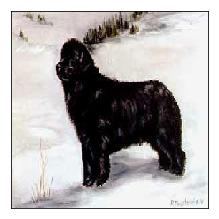

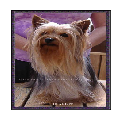

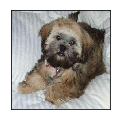

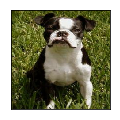

In [24]:
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()

**A dataset of (image, label) pairs**

We also need to create a Dataset of the labels so we can combine the two Datasets into one. This is done below in the same way we did with the list of all the paths to the images. In this case we also perform a `cast` function on the data to make sure it is in tf.int64 format.

In [0]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(label_list, tf.int64))

In [26]:
iterator = label_ds.make_one_shot_iterator()
iterator.get_next()

<tf.Tensor: id=48, shape=(), dtype=int64, numpy=78>

In [27]:
for label in label_ds.take(10):
  print(dog_class[label.numpy()])

newfoundland
yorkshire_terrier
lhasa
boston_bull
basenji
irish_setter
lhasa
bouvier_des_flandres
toy_terrier
italian_greyhound


After creating both the Image and Labels dataset we can combine the two into one Tensorflow Dataset. 

In [0]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [29]:
print(image_label_ds)

<DatasetV1Adapter shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int64)>


## Step 3: Create a CNN to Classify Dog Breeds - From Scratch

In [0]:
#BATCH_SIZE = 32

In [0]:

#ds = image_label_ds.apply(
#  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
#ds = ds.batch(BATCH_SIZE)
#ds = ds.prefetch(buffer_size=AUTOTUNE)
#ds

To finalize preparing the data we can add a couple of parameters to handle batching of the dataset elements. Below I have added the shuffle function - to shuffle all the images before training. I have also added the repeat method to allow the iterator to continuously extract data from this dataset. Finally the batch method with a value of 32. 

To keep track of how we are doing, not only on the training data but on data the model has not seen yet we need to create a validation and a testing dataset from our **ds** dataset. I will in this project use 15% of the data for validation and another 15% for testing. 

In [0]:
DATASET_SIZE = 10222
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)
train_dataset = image_label_ds.take(train_size)
test_dataset = image_label_ds.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

In [131]:
iterator = val_dataset.make_one_shot_iterator()
iterator.get_next()

(<tf.Tensor: id=200442, shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.42352942, 0.5058824 , 0.44705883],
         [0.46575633, 0.54810923, 0.48928574],
         [0.44733894, 0.5296919 , 0.47086835],
         ...,
         [0.24467774, 0.31134441, 0.24075617],
         [0.26624745, 0.33081317, 0.27437085],
         [0.23774438, 0.3004895 , 0.25735223]],
 
        [[0.44705883, 0.5214811 , 0.46530113],
         [0.43427965, 0.5087019 , 0.45252195],
         [0.42671943, 0.5011417 , 0.44496173],
         ...,
         [0.23262766, 0.29929432, 0.22870609],
         [0.26139367, 0.3259594 , 0.2695171 ],
         [0.2565806 , 0.3193257 , 0.27618843]],
 
        [[0.4264356 , 0.49702382, 0.44485295],
         [0.3964692 , 0.46705744, 0.4148866 ],
         [0.44256952, 0.5131577 , 0.46098688],
         ...,
         [0.23012906, 0.29679573, 0.2289386 ],
         [0.25658366, 0.3211494 , 0.2647071 ],
         [0.26940134, 0.33214644, 0.28900918]],
 
        ...,
 
        [[0.40313423,

In [132]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset = train_dataset.shuffle(train_size)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

<DatasetV1Adapter shapes: ((?, 224, 224, 3), (?,)), types: (tf.float32, tf.int64)>

In [0]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [43]:
len(model.trainable_variables)

10

In [44]:
EPOCHS=20
model_results = model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy()
         )

Epoch 1/20


W0823 07:13:34.949444 139638148700032 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


224/224 [==============================] - 40s 177ms/step - loss: 4.8113 - acc: 0.0102 - val_loss: 4.7895 - val_acc: 0.0137
Epoch 2/20
224/224 [==============================] - 28s 124ms/step - loss: 4.6215 - acc: 0.0325 - val_loss: 4.5455 - val_acc: 0.0365
Epoch 3/20
224/224 [==============================] - 28s 127ms/step - loss: 3.9181 - acc: 0.1349 - val_loss: 4.7162 - val_acc: 0.0391
Epoch 4/20
224/224 [==============================] - 28s 124ms/step - loss: 2.2174 - acc: 0.4784 - val_loss: 5.9854 - val_acc: 0.0424
Epoch 5/20
224/224 [==============================] - 28s 125ms/step - loss: 0.8156 - acc: 0.8025 - val_loss: 8.3301 - val_acc: 0.0391
Epoch 6/20
224/224 [==============================] - 28s 123ms/step - loss: 0.3764 - acc: 0.9120 - val_loss: 9.3783 - val_acc: 0.0346
Epoch 7/20
224/224 [==============================] - 28s 125ms/step - loss: 0.2783 - acc: 0.9369 - val_loss: 9.6545 - val_acc: 0.0372
Epoch 8/20
224/224 [==============================] - 28s 123ms/st

In [46]:
model.evaluate(test_dataset,
               verbose=1
               )

48/48 [==============================] - 9s 196ms/step - loss: 10.6085 - acc: 0.0254


[10.608492414156595, 0.025440313]

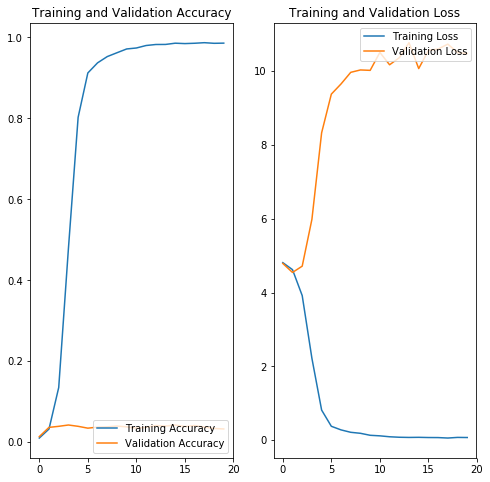

In [49]:
acc = model_results.history['acc']
val_acc = model_results.history['val_acc']

loss = model_results.history['loss']
val_loss = model_results.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Tuning the model**

In [0]:
#@title
model_two = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, 3, padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

In [0]:
model_two = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(224, 224, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),

   tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    
   tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
    
   tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.GlobalAveragePooling2D(),
    
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(120, activation='softmax')
])

In [0]:
model_two.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [149]:
model_two.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 128)     

In [0]:
# checkpoint
checkpoint_path = "dog_breed-weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')
callbacks_list = [checkpoint]

In [154]:
EPOCHS=20
model_results_two = model_two.fit(train_dataset,
          validation_data=val_dataset,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy(),
          callbacks=callbacks_list
         )

Epoch 1/20
223/224 [============================>.] - ETA: 0s - loss: 4.7818 - acc: 0.0111

W0823 09:18:23.618643 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00001: val_acc improved from -inf to 0.00456, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 32s 142ms/step - loss: 4.7816 - acc: 0.0112 - val_loss: 4.7868 - val_acc: 0.0046
Epoch 2/20
223/224 [============================>.] - ETA: 0s - loss: 4.7798 - acc: 0.0102

W0823 09:18:49.113394 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00002: val_acc improved from 0.00456 to 0.00978, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 25s 114ms/step - loss: 4.7798 - acc: 0.0103 - val_loss: 4.7865 - val_acc: 0.0098
Epoch 3/20
223/224 [============================>.] - ETA: 0s - loss: 4.7768 - acc: 0.0097
Epoch 00003: val_acc did not improve from 0.00978
224/224 [==============================] - 26s 115ms/step - loss: 4.7765 - acc: 0.0096 - val_loss: 4.7805 - val_acc: 0.0098
Epoch 4/20
223/224 [============================>.] - ETA: 0s - loss: 4.7526 - acc: 0.0149
Epoch 00004: val_acc did not improve from 0.00978
224/224 [==============================] - 25s 113ms/step - loss: 4.7526 - acc: 0.0148 - val_loss: 4.7605 - val_acc: 0.0091
Epoch 5/20
223/224 [============================>.] - ETA: 0s - loss: 4.7261 - acc: 0.0139

W0823 09:20:06.127109 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00005: val_acc improved from 0.00978 to 0.01369, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.7260 - acc: 0.0142 - val_loss: 4.7410 - val_acc: 0.0137
Epoch 6/20
223/224 [============================>.] - ETA: 0s - loss: 4.6940 - acc: 0.0164
Epoch 00006: val_acc did not improve from 0.01369
224/224 [==============================] - 26s 114ms/step - loss: 4.6941 - acc: 0.0163 - val_loss: 4.7285 - val_acc: 0.0137
Epoch 7/20
223/224 [============================>.] - ETA: 0s - loss: 4.6435 - acc: 0.0227

W0823 09:20:57.413828 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00007: val_acc improved from 0.01369 to 0.02151, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.6436 - acc: 0.0226 - val_loss: 4.6587 - val_acc: 0.0215
Epoch 8/20
223/224 [============================>.] - ETA: 0s - loss: 4.5736 - acc: 0.0238

W0823 09:21:22.898422 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00008: val_acc improved from 0.02151 to 0.02738, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 25s 114ms/step - loss: 4.5734 - acc: 0.0237 - val_loss: 4.6256 - val_acc: 0.0274
Epoch 9/20
223/224 [============================>.] - ETA: 0s - loss: 4.4934 - acc: 0.0328

W0823 09:21:49.059534 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00009: val_acc improved from 0.02738 to 0.04237, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 117ms/step - loss: 4.4930 - acc: 0.0326 - val_loss: 4.4832 - val_acc: 0.0424
Epoch 10/20
223/224 [============================>.] - ETA: 0s - loss: 4.4099 - acc: 0.0383

W0823 09:22:14.621099 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00010: val_acc improved from 0.04237 to 0.04302, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.4088 - acc: 0.0385 - val_loss: 4.3869 - val_acc: 0.0430
Epoch 11/20
223/224 [============================>.] - ETA: 0s - loss: 4.3144 - acc: 0.0478

W0823 09:22:40.446603 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00011: val_acc improved from 0.04302 to 0.05476, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 4.3146 - acc: 0.0476 - val_loss: 4.3269 - val_acc: 0.0548
Epoch 12/20
223/224 [============================>.] - ETA: 0s - loss: 4.2380 - acc: 0.0556

W0823 09:23:05.979961 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00012: val_acc improved from 0.05476 to 0.05671, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.2386 - acc: 0.0557 - val_loss: 4.2465 - val_acc: 0.0567
Epoch 13/20
223/224 [============================>.] - ETA: 0s - loss: 4.1860 - acc: 0.0590
Epoch 00013: val_acc did not improve from 0.05671
224/224 [==============================] - 26s 115ms/step - loss: 4.1844 - acc: 0.0593 - val_loss: 4.2010 - val_acc: 0.0541
Epoch 14/20
223/224 [============================>.] - ETA: 0s - loss: 4.1226 - acc: 0.0653

W0823 09:23:57.249995 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00014: val_acc improved from 0.05671 to 0.06584, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.1222 - acc: 0.0652 - val_loss: 4.1838 - val_acc: 0.0658
Epoch 15/20
223/224 [============================>.] - ETA: 0s - loss: 4.0759 - acc: 0.0726
Epoch 00015: val_acc did not improve from 0.06584
224/224 [==============================] - 26s 116ms/step - loss: 4.0759 - acc: 0.0725 - val_loss: 4.1445 - val_acc: 0.0658
Epoch 16/20
223/224 [============================>.] - ETA: 0s - loss: 4.0099 - acc: 0.0797

W0823 09:24:48.726793 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00016: val_acc improved from 0.06584 to 0.06714, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 114ms/step - loss: 4.0093 - acc: 0.0798 - val_loss: 4.1185 - val_acc: 0.0671
Epoch 17/20
223/224 [============================>.] - ETA: 0s - loss: 3.9636 - acc: 0.0890
Epoch 00017: val_acc did not improve from 0.06714
224/224 [==============================] - 26s 116ms/step - loss: 3.9634 - acc: 0.0889 - val_loss: 4.0957 - val_acc: 0.0671
Epoch 18/20
223/224 [============================>.] - ETA: 0s - loss: 3.9123 - acc: 0.0956

W0823 09:25:40.313001 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00018: val_acc improved from 0.06714 to 0.08018, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 115ms/step - loss: 3.9126 - acc: 0.0957 - val_loss: 4.0719 - val_acc: 0.0802
Epoch 19/20
223/224 [============================>.] - ETA: 0s - loss: 3.8634 - acc: 0.0954

W0823 09:26:06.395110 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).



Epoch 00019: val_acc improved from 0.08018 to 0.09126, saving model to dog_breed-weights.ckpt
224/224 [==============================] - 26s 116ms/step - loss: 3.8640 - acc: 0.0953 - val_loss: 4.0599 - val_acc: 0.0913
Epoch 20/20
223/224 [============================>.] - ETA: 0s - loss: 3.8261 - acc: 0.1058
Epoch 00020: val_acc did not improve from 0.09126
224/224 [==============================] - 26s 114ms/step - loss: 3.8231 - acc: 0.1071 - val_loss: 4.0383 - val_acc: 0.0802


In [155]:
model_two.evaluate(test_dataset,
               verbose=1
               )

48/48 [==============================] - 9s 190ms/step - loss: 4.0877 - acc: 0.0841


[4.087710534532865, 0.08414873]

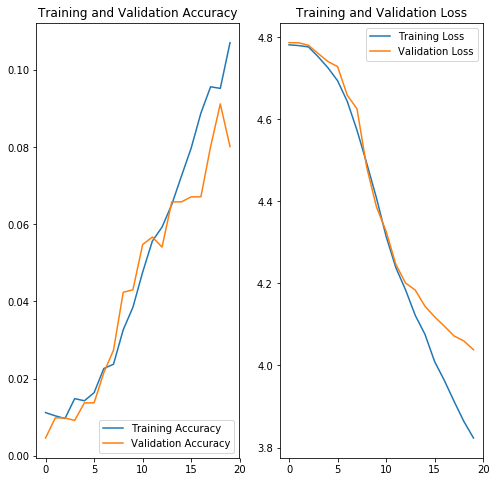

In [156]:
acc = model_results_two.history['acc']
val_acc = model_results_two.history['val_acc']

loss = model_results_two.history['loss']
val_loss = model_results_two.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Step 4: Use a CNN to Classify Dog Breeds - Using Transfer Learning

In this section I will use already trained neural nets using transfer learning. These nets has already been trained on a very large amount of images and can be integrated into our model to predict dog breeds. 
<br><br>
I will be using two different models `MobileNet v2` and also `ResNet-50`. Hopefully we will see better results using these pretrained neural nets. 

In [157]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 1s 0us/step


In [0]:
def change_range(image,label):
  return 2*image-1, label

mobile_ds = image_label_ds.map(change_range)

In [0]:
DATASET_SIZE = 10222

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset_mobile = mobile_ds.take(train_size)
test_dataset_mobile = mobile_ds.skip(train_size)
val_dataset_mobile = test_dataset_mobile.skip(val_size)
test_dataset_mobile = test_dataset_mobile.take(test_size)

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset_mobile = train_dataset_mobile.shuffle(train_size)
train_dataset_mobile = train_dataset_mobile.repeat()
train_dataset_mobile = train_dataset_mobile.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset_mobile = train_dataset_mobile.prefetch(buffer_size=AUTOTUNE)

test_dataset_mobile = test_dataset_mobile.batch(BATCH_SIZE)
val_dataset_mobile = val_dataset_mobile.batch(BATCH_SIZE)

In [0]:
model_mobile = tf.keras.models.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  #added Flatten + Dropout
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dense(len(label_names))
  tf.keras.layers.Dense(120, activation='softmax')
])

In [172]:
model_mobile.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
model_mobile.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_6 ( (None, 1280)              0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1280)              0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               655872    
_________________________________________________________________
dense_49 (Dense)             (None, 120)               61560     
Total params: 2,975,416
Trainable params: 717,432
Non-trainable params: 2,257,984
_____________________________________

In [0]:
# checkpoint
checkpoint_path = "dog_breed_mobile-weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_mobile = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')
callbacks_mobile = [checkpoint_mobile]

In [174]:
EPOCHS=5
model_results_mobile = model_mobile.fit(train_dataset_mobile,
          validation_data=val_dataset_mobile,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy(),
          callbacks=callbacks_mobile
         )

Epoch 1/5
223/224 [============================>.] - ETA: 0s - loss: 2.3728 - acc: 0.4311
Epoch 00001: val_acc improved from -inf to 0.67210, saving model to dog_breed_mobile-weights.ckpt


W0823 10:04:40.395283 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


224/224 [==============================] - 46s 206ms/step - loss: 2.3701 - acc: 0.4314 - val_loss: 1.1296 - val_acc: 0.6721
Epoch 2/5
223/224 [============================>.] - ETA: 0s - loss: 1.0737 - acc: 0.6925
Epoch 00002: val_acc improved from 0.67210 to 0.70469, saving model to dog_breed_mobile-weights.ckpt


W0823 10:05:15.402786 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


224/224 [==============================] - 35s 156ms/step - loss: 1.0724 - acc: 0.6931 - val_loss: 1.0209 - val_acc: 0.7047
Epoch 3/5
223/224 [============================>.] - ETA: 0s - loss: 0.7804 - acc: 0.7605
Epoch 00003: val_acc did not improve from 0.70469
224/224 [==============================] - 35s 155ms/step - loss: 0.7791 - acc: 0.7610 - val_loss: 1.0456 - val_acc: 0.6962
Epoch 4/5
223/224 [============================>.] - ETA: 0s - loss: 0.6331 - acc: 0.8024
Epoch 00004: val_acc did not improve from 0.70469
224/224 [==============================] - 35s 154ms/step - loss: 0.6320 - acc: 0.8026 - val_loss: 1.0342 - val_acc: 0.7034
Epoch 5/5
223/224 [============================>.] - ETA: 0s - loss: 0.5112 - acc: 0.8386
Epoch 00005: val_acc did not improve from 0.70469
224/224 [==============================] - 35s 155ms/step - loss: 0.5103 - acc: 0.8387 - val_loss: 1.1569 - val_acc: 0.6969


In [175]:
model_mobile.evaluate(test_dataset,
               verbose=1
               )

48/48 [==============================] - 13s 267ms/step - loss: 1.2380 - acc: 0.6765


[1.2379669758180778, 0.6764514]

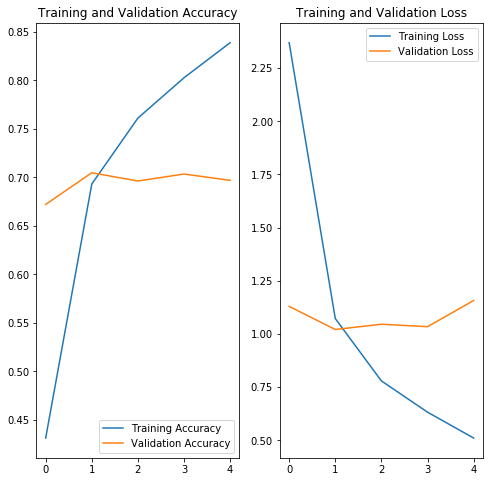

In [176]:
acc = model_results_mobile.history['acc']
val_acc = model_results_mobile.history['val_acc']

loss = model_results_mobile.history['loss']
val_loss = model_results_mobile.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [213]:
res_net = tf.keras.applications.resnet50.ResNet50(input_shape=[224,224,3], include_top=False, weights='imagenet')
res_net.trainable=False

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
DATASET_SIZE = 10222

train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset_resnet = image_label_ds.take(train_size)
test_dataset_resnet = image_label_ds.skip(train_size)
val_dataset_resnet = test_dataset_resnet.skip(val_size)
test_dataset_resnet = test_dataset_resnet.take(test_size)

In [0]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
train_dataset_resnet = train_dataset_resnet.shuffle(train_size)
train_dataset_resnet = train_dataset_resnet.repeat()
train_dataset_resnet = train_dataset_resnet.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
train_dataset_resnet = train_dataset_resnet.prefetch(buffer_size=AUTOTUNE)

test_dataset_resnet = test_dataset_resnet.batch(BATCH_SIZE)
val_dataset_resnet = val_dataset_resnet.batch(BATCH_SIZE)

In [0]:
model_resnet = tf.keras.models.Sequential([
  res_net,
  #tf.keras.layers.GlobalAveragePooling2D(),
  #added Flatten + Dropout
  #tf.keras.layers.Flatten(),
  #tf.keras.layers.Dropout(0.2), 
  #tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dense(len(label_names))
  tf.keras.layers.Dense(120, activation='softmax')
])

In [221]:
model_resnet.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])
model_resnet.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_12  (None, 2048)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 120)               245880    
Total params: 23,833,592
Trainable params: 245,880
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
# checkpoint
checkpoint_path = "dog_breed_resnet-weights.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_resnet = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='max')
callbacks_resnet = [checkpoint_resnet]

In [223]:
EPOCHS=5
model_results_resnet = model_resnet.fit(train_dataset_resnet,
          validation_data=val_dataset_resnet,
          epochs=EPOCHS,
          steps_per_epoch=tf.ceil(train_size/BATCH_SIZE).numpy(),
          verbose=1,                
          validation_steps=tf.ceil(val_size / BATCH_SIZE).numpy(),
          callbacks=callbacks_resnet
         )

Epoch 1/5
223/224 [============================>.] - ETA: 0s - loss: 2.9042 - acc: 0.3272
Epoch 00001: val_acc improved from -inf to 0.00847, saving model to dog_breed_resnet-weights.ckpt


W0823 11:01:15.534467 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


224/224 [==============================] - 88s 393ms/step - loss: 2.8988 - acc: 0.3285 - val_loss: 5.3076 - val_acc: 0.0085
Epoch 2/5
223/224 [============================>.] - ETA: 0s - loss: 1.1878 - acc: 0.6885
Epoch 00002: val_acc improved from 0.00847 to 0.00913, saving model to dog_breed_resnet-weights.ckpt


W0823 11:02:31.726257 139638148700032 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


224/224 [==============================] - 76s 340ms/step - loss: 1.1862 - acc: 0.6890 - val_loss: 5.4453 - val_acc: 0.0091
Epoch 3/5
223/224 [============================>.] - ETA: 0s - loss: 0.7507 - acc: 0.8021

KeyboardInterrupt: ignored

In [0]:
model_resnet.evaluate(test_dataset,
               verbose=1
               )

In [0]:
acc = model_results_mobile.history['acc']
val_acc = model_results_mobile.history['val_acc']

loss = model_results_mobile.history['loss']
val_loss = model_results_mobile.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 4. Data Augmentation

After training on the original images we got a test accuracy of 65% as the maximum value from all the models we trained. Now its time to augment the images using functions to create new images that we use to train the network. Possible augmentation areas could be changing the original image orientation (flipping and rotation) color (hue, saturation, brightness, contrast) and 
zooming. I will focus on the two first options image **orientation** and **color**. 

### Rotation and flipping

One of the most simplest augmentations is rotating the image 90 degrees. For this we can use the rot90 function of Tensorflow. To get a new random rotation for each image we need to use a random function from Tensorflow itself. Random functions from Tensorflow are evaluated for every input, functions from numpy or basic python only once which would result in a static augmentation.

In [1]:
def rotate(x: tf.Tensor) -> tf.Tensor:
    """Rotation augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """

    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(x, tf.random_uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

NameError: ignored

In [0]:
def flip(x: tf.Tensor) -> tf.Tensor:
    """Flip augmentation

    Args:
        x: Image to flip

    Returns:
        Augmented image
    """
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)

    return x

### Color augmentations

Color augmentations are applicable to almost every image learning task. In Tensorflow there are four color augmentations readily available: hue, saturation, brightness and contrast. These functions only require a range and will result in an unique augmentation for each image.

In [0]:
def color(x: tf.Tensor) -> tf.Tensor:
    """Color augmentation

    Args:
        x: Image

    Returns:
        Augmented image
    """
    x = tf.image.random_hue(x, 0.08)
    x = tf.image.random_saturation(x, 0.6, 1.6)
    x = tf.image.random_brightness(x, 0.05)
    x = tf.image.random_contrast(x, 0.7, 1.3)
    return x

# 5. Training new CNN after Data Augmentation